In [199]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *


In [200]:
from PIL import Image

def callingFunc(i):
    x1 = Image.open(
        r'..\stormdata\Storm Classification\Storm\storm'+str(i)+'.jpg').convert('L');
    y1 = np.asarray(x1.getdata(), dtype=np.float64).reshape((x1.size[1], x1.size[0]));

    y_dat1 = np.asarray(y1, dtype=np.uint8);
    y_dat1_Im = transforms.ToTensor()(y_dat1).unsqueeze_(0);
    
    
    return y_dat1

def callingFuncN(i):
    x1 = Image.open(
        r'..\stormdata\Storm Classification\No storm\No_storm'+str(i)+'.jpg').convert('L');
    y1 = np.asarray(x1.getdata(), dtype=np.float64).reshape((x1.size[1], x1.size[0]));

    y_dat1 = np.asarray(y1, dtype=np.uint8);
    y_dat1_Im = transforms.ToTensor()(y_dat1).unsqueeze_(0);
    
    
    return y_dat1    

In [201]:
input_o = [callingFunc(i+1) for i in range(63)]+[callingFuncN(i+1) for i in range(25)]

In [202]:
target_o = [0 for i in range(63)]+[1 for i in range(25)]

In [378]:
import random
np.random.seed(0)
idx=np.array([int(i) for i in range(88)]).flatten()
np.random.shuffle(idx)


idxdataInput = list( input_o[i] for i in idx )
dataTarget = list( target_o[i] for i in idx )

In [394]:
desired_vector


array([0.07547845, 0.06670188, 0.05968063, 0.04212751, 0.07196782,
       0.02281907, 0.03686157, 0.01755313, 0.07547845, 0.03861688,
       0.07196782, 0.03861688, 0.00175531, 0.028085  , 0.02457438,
       0.01228719, 0.0684572 , 0.05090407, 0.06670188, 0.2615416 ,
       0.14569096, 0.028085  , 0.04037219, 0.01053188, 0.05090407,
       0.04914876, 0.0684572 , 0.37563693, 0.25276504, 0.07021251,
       0.02984032, 0.03159563, 0.00526594, 0.05265938, 0.10707408,
       0.15973346, 0.09478689, 0.17026534, 0.05265938, 0.06670188,
       0.08074439, 0.02984032, 0.03686157, 0.13164846, 0.12813783,
       0.13340377, 0.09127626, 0.20712691, 0.06670188, 0.14218033,
       0.10707408, 0.12287189, 0.13340377, 0.1790419 , 0.27382879,
       0.19659503, 0.12989314, 0.10882939, 0.13164846, 0.10180814,
       0.10005283, 0.15797815, 0.28436067, 0.22994597])

In [400]:
import math


from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer


testdata=idxdataInput[1]+1
data_norm=sum((testdata.flatten()/max(testdata.flatten()))**2)
desired_vector = testdata.flatten()/max(testdata.flatten())/np.sqrt(data_norm)


qr = QuantumRegister(6)
cr = ClassicalRegister(6)
qc = QuantumCircuit(qr,cr, name='Initialization')
qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
qc.draw()


»
q449_0: »
        »
q449_1: »
        »
q449_2: »
        »
q449_3: »
        »
q449_4: »
        »
q449_5: »
        »
 c44: 6/»
        »
«        ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q449_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ├
«        │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 │
«q449_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ├
«        │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 │
«q449_2: ┤2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ├
«        │  initialize(0.075478,0.066702,0.059681,0.042128,0.071968,0.022819,0.036862,0.017553,0.075478,0.038617,0.071968,0.038617,0.0017553,0.028085,0.024574,0.012287,0.068457,0.050904,0.066702,0.26154,0.14569,0.028085,0.040372,0.010532,0.050904,0.049149,0.068457,0.37564,0.25277,0.070213,0.02984,0.031596,0.0052659,0.052659,0.10707,0.15973,0.094787,0.17027,0.052659,0.066702,0.080744,0.02984,0.036862,0.13165,0.12814,0

In [401]:
from qiskit import Aer, execute

nshot=100000;
backend = Aer.get_backend('qasm_simulator')
qc.measure(qr[:],cr[:])
job = execute(qc, backend, shots=nshot)
result = job.result()
count =result.get_counts()


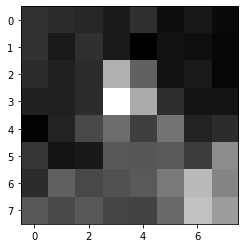

In [402]:
plt.imshow(testdata.squeeze(), cmap='gray')

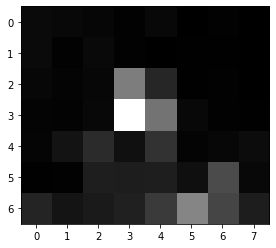

In [406]:
from collections import OrderedDict
out=np.array(list((OrderedDict(sorted(count.items())).values())))
norm_out=out/max(out)

from toolz import partition
out_img=np.array(list(partition(8, norm_out)));
plt.imshow(out_img.squeeze(), cmap='gray')

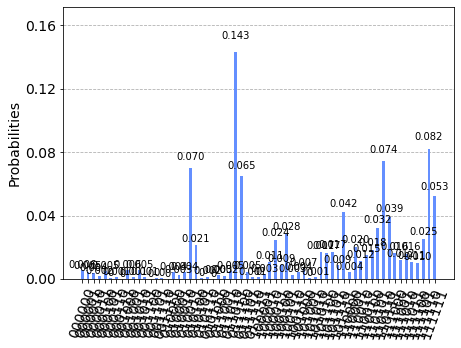

In [407]:
from qiskit.visualization import plot_histogram
plot_histogram(count)

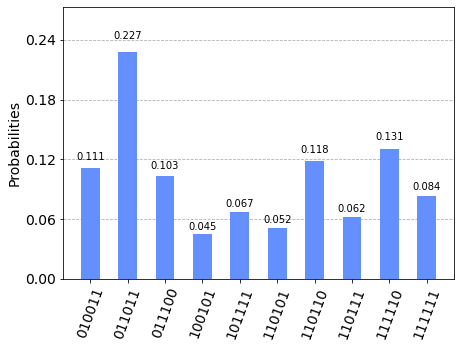

In [408]:
from collections import Counter
c = Counter(count)
c1=c.most_common(10)

plot_histogram(dict(c1))

In [409]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "Diffuser"
    return U_s

In [410]:
arr_data=testdata.flatten()/255;
encoding_data=[1/8 for i in range(64)]+complex(0.0, 1.0)* np.array([np.round(x,8) for x in arr_data]);
sum_const=np.sqrt(sum(np.absolute(encoding_data) ** 2))
encoding_norm=encoding_data/sum_const

In [411]:
testdata=idxdataInput[1]
desired_vector = encoding_norm

qr = QuantumRegister(6)
cr = ClassicalRegister(6)

#Initilzation
qc = QuantumCircuit(qr, name='Initialization')
qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
my_inst = qc.to_instruction()

#Grover Search
my_circuit = QuantumCircuit(qr,cr)
for qubit in range(nqubits):
    my_circuit.h(qubit)
my_circuit.append(my_inst, range(6))
my_circuit.append(diffuser(nqubits), [0,1,2,3,4,5])
my_circuit.measure(qr[:],cr[:])
my_circuit.draw()



┌───┐┌─────────────────┐┌───────────┐┌─┐               
q458_0: ┤ H ├┤0                ├┤0          ├┤M├───────────────
        ├───┤│                 ││           │└╥┘┌─┐            
q458_1: ┤ H ├┤1                ├┤1          ├─╫─┤M├────────────
        ├───┤│                 ││           │ ║ └╥┘┌─┐         
q458_2: ┤ H ├┤2                ├┤2          ├─╫──╫─┤M├─────────
        ├───┤│  Initialization ││  Diffuser │ ║  ║ └╥┘┌─┐      
q458_3: ┤ H ├┤3                ├┤3          ├─╫──╫──╫─┤M├──────
        ├───┤│                 ││           │ ║  ║  ║ └╥┘┌─┐   
q458_4: ┤ H ├┤4                ├┤4          ├─╫──╫──╫──╫─┤M├───
        ├───┤│                 ││           │ ║  ║  ║  ║ └╥┘┌─┐
q458_5: ┤ H ├┤5                ├┤5          ├─╫──╫──╫──╫──╫─┤M├
        └───┘└─────────────────┘└───────────┘ ║  ║  ║  ║  ║ └╥┘
 c45: 6/══════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                              0  1  2  3  4  5

In [412]:
nshot=100000;
backend = Aer.get_backend('qasm_simulator')
job = execute(my_circuit, backend, shots=nshot)
result = job.result()
count =result.get_counts()

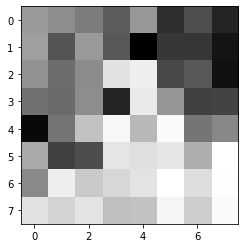

In [415]:
from collections import OrderedDict
out=np.array(list((OrderedDict(sorted(count.items())).values())))
norm_out=1-out/max(out)

from toolz import partition
out_img=np.array(list(partition(8, norm_out)));
plt.imshow(out_img.squeeze(), cmap='gray')

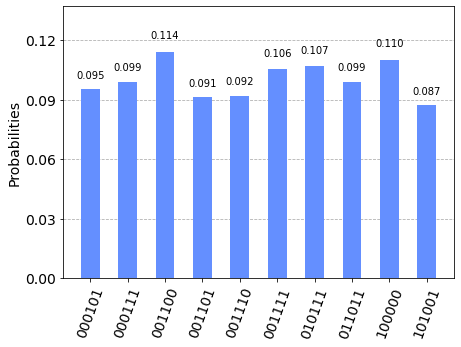

In [416]:
from collections import Counter
c = Counter(count)
c1=c.most_common(10)

plot_histogram(dict(c1))

In [417]:
np.pi*np.sqrt(64)/4

6.283185307179586

In [426]:
testdata=idxdataInput[1]
desired_vector = encoding_norm

qr = QuantumRegister(6)
cr = ClassicalRegister(6)

#Initilzation
qc = QuantumCircuit(qr, name='Initialization')
qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
my_inst = qc.to_instruction()

#Grover Search
my_circuit = QuantumCircuit(qr,cr)
for qubit in range(nqubits):
    my_circuit.h(qubit)

#1
my_circuit.append(my_inst, range(6))
my_circuit.append(diffuser(nqubits), [0,1,2,3,4,5])
#2
my_circuit.append(my_inst, range(6))
my_circuit.append(diffuser(nqubits), [0,1,2,3,4,5])




my_circuit.measure(qr[:],cr[:])
my_circuit.draw()

┌───┐┌─────────────────┐┌───────────┐┌─────────────────┐┌───────────┐»
q536_0: ┤ H ├┤0                ├┤0          ├┤0                ├┤0          ├»
        ├───┤│                 ││           ││                 ││           │»
q536_1: ┤ H ├┤1                ├┤1          ├┤1                ├┤1          ├»
        ├───┤│                 ││           ││                 ││           │»
q536_2: ┤ H ├┤2                ├┤2          ├┤2                ├┤2          ├»
        ├───┤│  Initialization ││  Diffuser ││  Initialization ││  Diffuser │»
q536_3: ┤ H ├┤3                ├┤3          ├┤3                ├┤3          ├»
        ├───┤│                 ││           ││                 ││           │»
q536_4: ┤ H ├┤4                ├┤4          ├┤4                ├┤4          ├»
        ├───┤│                 ││           ││                 ││           │»
q536_5: ┤ H ├┤5                ├┤5          ├┤5                ├┤5          ├»
        └───┘└─────────────────┘└───────────┘└─────────────────┘└───────────┘»
 c48: 6/═════════════════════════════════════════════════════════════════════»
                                                                             »
«        ┌─┐               
«q536_0: ┤M├───────────────
«        └╥┘┌─┐            
«q536_1: ─╫─┤M├────────────
«         ║ └╥┘┌─┐         
«q536_2: ─╫──╫─┤M├─────────
«         ║  ║ └╥┘┌─┐      
«q536_3: ─╫──╫──╫─┤M├──────
«         ║  ║  ║ └╥┘┌─┐   
«q536_4: ─╫──╫──╫──╫─┤M├───
«         ║  ║  ║  ║ └╥┘┌─┐
«q536_5: ─╫──╫──╫──╫──╫─┤M├
«         ║  ║  ║  ║  ║ └╥┘
« c48: 6/═╩══╩══╩══╩══╩══╩═
«         0  1  2  3  4  5

In [427]:
nshot=100000;
backend = Aer.get_backend('qasm_simulator')
job = execute(my_circuit, backend, shots=nshot)
result = job.result()
count =result.get_counts()

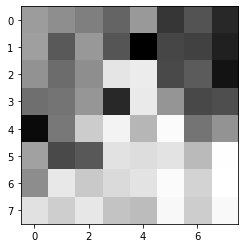

In [428]:
from collections import OrderedDict
out=np.array(list((OrderedDict(sorted(count.items())).values())))
norm_out=1-out/max(out)

from toolz import partition
out_img=np.array(list(partition(8, norm_out)));
plt.imshow(out_img.squeeze(), cmap='gray')

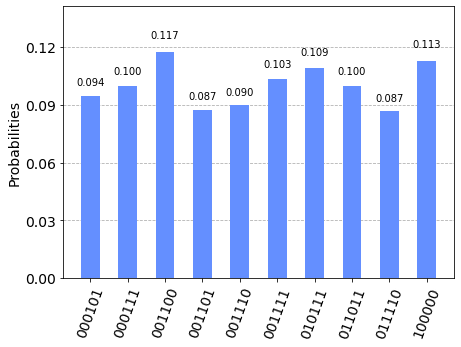

In [429]:
from collections import Counter
c = Counter(count)
c1=c.most_common(10)

plot_histogram(dict(c1))

In [12]:
 from qiskit import IBMQ
IBMQ.save_account(' d816c5b14d43487a0fe4c38bd0c7d6747ad6d124d204b845d53db706177488baa451840d93782b7b5353935c1ff7b97180c73119ca4aab4401222413e826c9d1')
 
IBMQ.load_account()
provider = IBMQ.get_provider()
backend = provider.get_backend('ibmqx2')

configrc.store_credentials:WARNING:2021-07-25 01:25:17,431: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-07-25 01:25:17,538: Credentials are already in use. The existing account in the session will be replaced.
